In [91]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from orbit.models.dlt import ETSFull, DLTFull
from orbit.diagnostics.plot import plot_predicted_data
plt.style.use('seaborn-whitegrid')
from darts.models import *
from darts import TimeSeries

In [92]:
data = pd.read_csv("../data/data.csv", index_col=0)
#data = pd.read_csv("../data/summer.csv", index_col=0)

In [93]:
df = pd.DataFrame(data)
df

,time,price
0,2019-01-02T07:00:00+00:00,39.8100
1,2019-01-02T07:15:00+00:00,39.2350
2,2019-01-02T07:30:00+00:00,39.3625
3,2019-01-02T07:45:00+00:00,39.3825
4,2019-01-02T08:00:00+00:00,39.1250
...,...,...
2602,2019-02-28T22:15:00+00:00,43.3125
2603,2019-02-28T22:30:00+00:00,43.3025
2604,2019-02-28T22:45:00+00:00,43.3200
2605,2019-02-28T23:00:00+00:00,43.3025


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


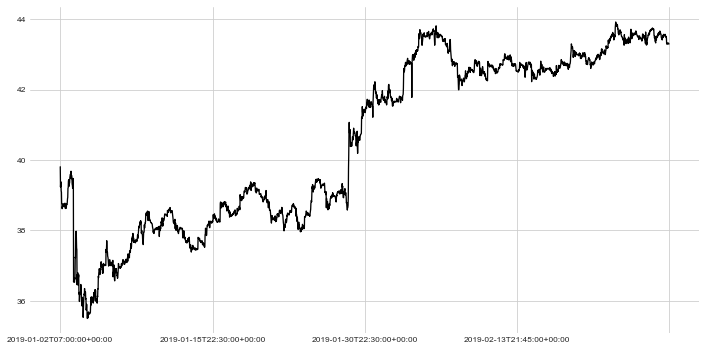

In [94]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['time'], df['price'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(len(df['time']) / 4))
plt.show()

In [95]:
df['time'] = pd.to_datetime(df['time'])
df['time'] = pd.to_numeric(df['time'])


test_size = 65
train = df[:-test_size]
test = df[-test_size:]
train.dtypes

time       int64
price    float64
dtype: object

In [96]:

ets = ETSFull(
    response_col='price',
    date_col='time',
    seasonality=52,
    seed=8888,
)

In [97]:
%%time

ets.fit(train)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Wall time: 10.7 s


In [98]:
predicted_df = ets.predict(test)

In [99]:
predicted_df['time'] = pd.to_datetime(predicted_df['time'])
train['time'] = pd.to_datetime(train['time'])
predicted_df

C:\Users\spark\.conda\envs\stan_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,time,prediction_5,prediction,prediction_95
0,2019-02-28 07:00:00,43.427496,43.681979,43.918943
1,2019-02-28 07:15:00,43.357712,43.652324,43.978616
2,2019-02-28 07:30:00,43.205405,43.664123,44.008423
3,2019-02-28 07:45:00,43.201644,43.651747,44.022468
4,2019-02-28 08:00:00,43.258180,43.645765,44.021335
...,...,...,...,...
60,2019-02-28 22:15:00,42.407896,43.827910,45.063498
61,2019-02-28 22:30:00,42.408873,43.770294,45.146884
62,2019-02-28 22:45:00,42.422148,43.827443,45.051420
63,2019-02-28 23:00:00,42.338234,43.753059,45.086263


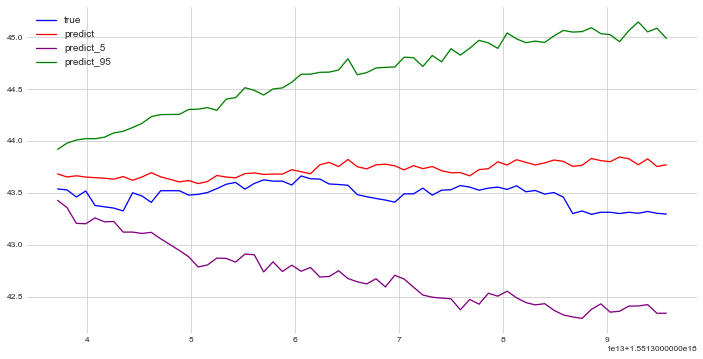

In [100]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test['time'], test['price'], c='b', label='true')
ax.plot(test['time'], predicted_df['prediction'], c='r', label='predict')
ax.plot(test['time'], predicted_df['prediction_5'], c='purple',label='predict_5')
ax.plot(test['time'], predicted_df['prediction_95'], c='green',label='predict_95')
plt.legend()
plt.show()

In [101]:
dlt = DLTFull(response_col='price', date_col='time')

In [102]:
%%time

dlt.fit(train)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Wall time: 1min 49s


In [103]:
predicted_df = ets.predict(test)

In [104]:
predicted_df['time'] = pd.to_datetime(predicted_df['time'])
train['time'] = pd.to_datetime(train['time'])
train

C:\Users\spark\.conda\envs\stan_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,time,price
0,2019-01-02 07:00:00,39.8100
1,2019-01-02 07:15:00,39.2350
2,2019-01-02 07:30:00,39.3625
3,2019-01-02 07:45:00,39.3825
4,2019-01-02 08:00:00,39.1250
...,...,...
2537,2019-02-27 22:15:00,43.7275
2538,2019-02-27 22:30:00,43.7175
2539,2019-02-27 22:45:00,43.7025
2540,2019-02-27 23:00:00,43.7250


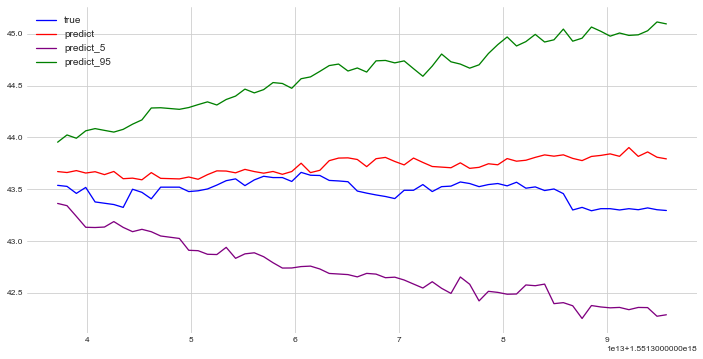

In [105]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test['time'], test['price'], c='b', label='true')
ax.plot(test['time'], predicted_df['prediction'], c='r', label='predict')
ax.plot(test['time'], predicted_df['prediction_5'], c='purple',label='predict_5')
ax.plot(test['time'], predicted_df['prediction_95'], c='green',label='predict_95')
plt.legend()
plt.show()

